In [1]:
#I wanted to share this dataset as an opportunity to practice 1) the NLP skillset covered in PluralSight and 2) EDA for the Data Science Assessment. 

#The ask with this dataset is to present a statistical analysis of the attached data. Using whatever tools you consider appropriate, please answer the question, "What factors make a Young Adult author more likely to be successful?" Assume that success means a rating of 4.5 or above and a reviewer count of 100 or above. 

#If you choose to participate in this optional assignment, please spend a few hours and create a notebook to share by 11/20. We can then review together and share our technique + findings. My hope is that this assignment can help flesh out/standardize what we might do in a DS Assessment + provide NLP practice.


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
data = pd.read_csv("2016_YA_books.csv")
data.head()
data.shape
data.head(5)

,Book title,Author name,Star rating,Number of reviews,Length,Publisher
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press


In [4]:
data = data.rename(columns = {"Book title":"title", "Author name":"author", "Star rating":"rating", "Number of reviews":"n_reviews", "Length":"length", "Publisher":"pub"})
data.describe()

,rating,n_reviews,length
count,100.000000,100.00000,100.000000
mean,4.315000,164.55000,327.440000
std,0.399842,261.62601,116.095861
min,3.000000,1.00000,52.000000
25%,4.000000,28.00000,242.000000
50%,4.500000,74.50000,323.000000
75%,4.500000,179.00000,400.000000
max,5.000000,1591.00000,793.000000


In [5]:
#return unique value counts for each col

for col in data.columns:
    uni = np.unique(data[col])
    print(col, np.prod(uni.shape))

title 100
author 96
rating 5
n_reviews 82
length 79
pub 56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA81E44888>,
      dtype=object)

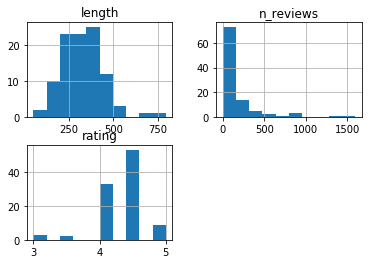

In [6]:
pd.DataFrame(data, columns = ['rating', 'n_reviews', 'length']).hist()

In [7]:
#create target variable 'success'
data['success'] = np.where((data['rating'] > 4) & (data['n_reviews']), 1, 0)
data.head(10)

,title,author,rating,n_reviews,length,pub,success
0,Mistrust,Margaret McHeyzer,4.5,64,333,Amazon,0
1,Girl in Pieces,Kathleen Glasgow,4.5,139,418,Delacorte,1
2,Just Juliet,Charlotte Reagan,4.5,369,224,Inkitt,1
3,Dork in Love ~ Tales of My Dorky Love Life: Te...,Ann Writes,4.5,9,122,Amazon,1
4,Warrior Cats: Battle (Warrior Cats (Werecat YA...,Tiyana Angel,5.0,1,52,Guardian Angel Press,1
5,Out of Beat (Boys of Fallout Book 1),Cassandra Giovanni,4.5,11,231,Show not Tell Publishing,1
6,A Different Truth,Annette Oppenlander,4.5,25,256,Amazon,1
7,Tell Me Three Things,Julie Buxbaum,4.5,218,338,Delacorte,0
8,The Fever Code: Book Five,James Dashner,4.5,235,384,Delacorte,1
9,The Passion of Dolssa,Julie Berry,4.5,57,496,Viking Books for Young Readers,1


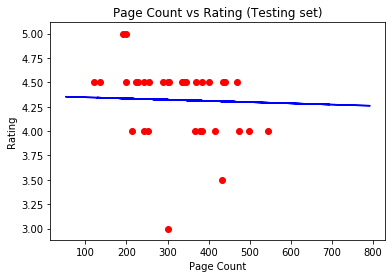

In [8]:
# simple linear model w 2 variables
import matplotlib.pyplot as plt

#split
data_num = data[['length', 'rating']]
X = data_num.iloc[:,:-1].values  #independent variable array
y = data_num.iloc[:,1].values  #dependent variable vector

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

#fit model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

#predict
y_pred = regressor.predict(X_test) 
y_pred



#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Page Count vs Rating (Testing set)")
 
plt.xlabel("Page Count") 
plt.ylabel("Rating") 
plt.show() 

In [9]:

'''
# next steps:
1. split author names into M/F?
2. Encode publisher (prob important, if they sell on AMZN)
3. cluster book names? "Trilogy" might indicate success, but maybe not cause it?
'''


'\n# next steps:\n1. split author names into M/F?\n2. Encode publisher (prob important, if they sell on AMZN)\n3. cluster book names? "Trilogy" might indicate success, but maybe not cause it?\n'